<a href="https://colab.research.google.com/github/Sreevallitata/pythondeeplearning/blob/master/DeepLearning_icp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#addining a hidden layer
hiddenLayer=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
autoencoder1.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.5316 - val_loss: 0.4638
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.4295 - val_loss: 0.4071
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3960 - val_loss: 0.3884
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3789 - val_loss: 0.3728
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3647 - val_loss: 0.3603
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.4954 - accuracy: 0.4614 - val_loss: 0.4091 - val_accuracy: 0.4875
Epoch 2/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.3888 - accuracy: 0.4921 - val_loss: 0.3755 - val_accuracy: 0.4918
Epoch 3/5
60000/60000 [

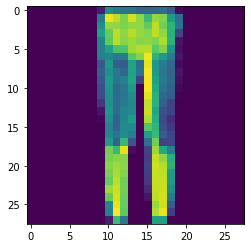

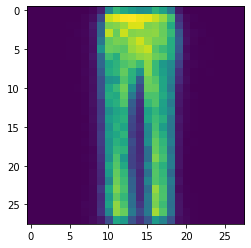

In [0]:
prediction = autoencoder1.predict(x_test[[3],:])
#prediction
from matplotlib import pyplot as plt
plt.imshow(x_test[3].reshape(28,28))
plt.show()
from matplotlib import pyplot as plt
plt.imshow(prediction[0].reshape(28,28))
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3344 - accuracy: 0.5016 - val_loss: 0.3180 - val_accuracy: 2.5510e-07
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3295 - accuracy: 0.5023 - val_loss: 0.3190 - val_accuracy: 2.5510e-07
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3267 - accuracy: 0.5027 - val_loss: 0.3111 - val_accuracy: 2.5510e-07
Epoch 4/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3243 - accuracy: 0.5030 - val_loss: 0.3080 - val_accuracy: 2.5510e-07
Epoch 5/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.3222 - accuracy: 0.5033 - val_loss: 0.3081 - val_accuracy: 2.5510e-07
Epoch 6/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.3211 - accuracy: 0.5035 - val_loss: 0.3078 - val_accuracy: 2.5510e-07
Epoch 7/10
60000/60000 [==============

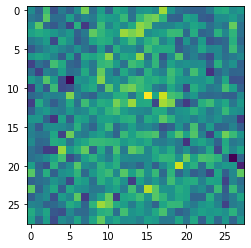

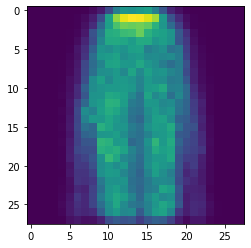

In [0]:
#Adding Noies
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
history=autoencoder1.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[2].reshape(28,28))
plt.show()
prediction1 = autoencoder1.predict(x_train_noisy[[2],:])
#prediction1[0]
from matplotlib import pyplot as plt
plt.imshow(prediction1[0].reshape(28,28))
plt.show()

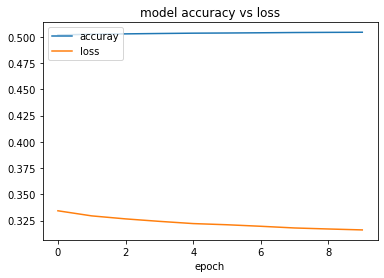

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()
